In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('commits.csv')

In [68]:
df

,Commit ID,Commit Message,Author Name,Author Email,Created at,Updated at,Files Changed,Branch,Contributor,All Checks Passed
0,e4fe460e02f9f29ea2553e579e7599a652ca5207,Bump ruff from 0.0.269 to 0.0.270 in /requirem...,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2023-05-29 22:56:26,2023-05-29 22:56:26,['requirements/requirements.txt'],5ddf70615ea35c366199ef6837ea88eba94ba6c8,dependabot[bot],True
1,5ddf70615ea35c366199ef6837ea88eba94ba6c8,Add dark mode feature in documentation (#842),Faizan Alam,51821426+Faizan-Alam-1@users.noreply.github.com,2023-05-28 08:22:35,2023-05-28 08:22:35,"['docs/conf.py', 'docs/doc_requirements.txt']",ca82a4b1dff20dba0c852f4e0ac41501cba6e9ab,Faizan-Alam-1,True
2,ca82a4b1dff20dba0c852f4e0ac41501cba6e9ab,Add copy button in the documentation code snip...,Faizan Alam,51821426+Faizan-Alam-1@users.noreply.github.com,2023-05-27 11:30:02,2023-05-27 11:30:02,"['docs/conf.py', 'docs/doc_requirements.txt']",390c1cdd9fce482f13280724d762c9f9000baaba,Faizan-Alam-1,True
3,390c1cdd9fce482f13280724d762c9f9000baaba,Bump ruff from 0.0.267 to 0.0.269 in /requirem...,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2023-05-23 03:42:52,2023-05-23 03:42:52,['requirements/requirements.txt'],7be69c13cce0f518d3ce5521b4bafcc56bce1445,dependabot[bot],True
4,7be69c13cce0f518d3ce5521b4bafcc56bce1445,Bump pytest-xdist from 3.3.0 to 3.3.1 in /requ...,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2023-05-22 22:23:34,2023-05-22 22:23:34,['requirements/requirements.txt'],874ebff495b088e0aee48ad29e352548dee65e8d,dependabot[bot],True
...,...,...,...,...,...,...,...,...,...,...
1838,0a6466b919498640cdd35cb44c4ea90972a1f001,Add SteepestDescentMethod sample,AtsushiSakai,asakai.amsl+github@gmail.com,2016-05-02 07:04:07,2016-05-02 07:04:07,['scripts/optimization/SteepestDescentMethod/S...,db832a65c9a52a863f1725d28a592c4e19aa8a44,AtsushiSakai,True
1839,db832a65c9a52a863f1725d28a592c4e19aa8a44,add new sample,AtsushiSakai,asakai.amsl+github@gmail.com,2016-03-27 08:08:00,2016-03-27 08:08:00,['scripts/PathPlanning/RRT/rrt_with_pathsmooth...,786ef04335bfd43cd86b9b6d77e3ba4bf4476094,AtsushiSakai,True
1840,786ef04335bfd43cd86b9b6d77e3ba4bf4476094,Update README,Atsushi Sakai,asakai.amsl+github@gmail.com,2016-03-23 00:27:51,2016-03-23 00:27:51,['README.md'],33cfa18414779b14561acf18959283b18ccb88e7,AtsushiSakai,True
1841,33cfa18414779b14561acf18959283b18ccb88e7,add simple_rrt.py,AtsushiSakai,asakai.amsl+github@gmail.com,2016-03-22 22:55:33,2016-03-22 22:55:33,"['.gitignore', 'scripts/PathPlanning/RRT/simpl...",18195ed7f8b9cf52507fa665be6a6f22b056fe3c,AtsushiSakai,True


In [69]:
df['commit_date'] = pd.to_datetime(df['Updated at'])
df['Year'] = df['commit_date'].dt.year
df['Month'] = df['commit_date'].dt.month_name()
df['Hour'] = df['commit_date'].dt.hour

In [70]:
df.duplicated().value_counts()

False    1843
Name: count, dtype: int64

In [71]:
missing_values = df.isnull()
missing_counts = missing_values.sum()
missing_counts

Commit ID             0
Commit Message        0
Author Name           0
Author Email          0
Created at            0
Updated at            0
Files Changed         0
Branch                1
Contributor          22
All Checks Passed     0
commit_date           0
Year                  0
Month                 0
Hour                  0
dtype: int64

In [72]:
df = df.fillna('unknown')

In [73]:
df['Contributor'].value_counts()

Contributor
AtsushiSakai       1320
dependabot[bot]     166
Gjacquenot           47
guilyx               27
goktug97             23
                   ... 
hotsuyuki             1
karaage0703           1
wang701               1
FXCarl                1
atsushi-sakai         1
Name: count, Length: 101, dtype: int64

In [74]:
df['Contributor'].value_counts().mean()

18.247524752475247

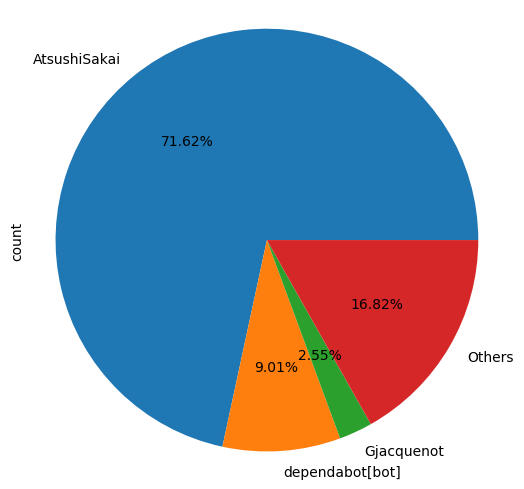

In [75]:
counts = df['Contributor'].value_counts()
top = counts.head(3)
other = counts.iloc[3:].sum()
top['Others'] = other
top.plot(kind='pie', autopct = '%1.2f%%', figsize=(6, 6))
plt.axis('equal')
plt.show()

In [109]:
df['File num'] = (df['Files Changed'].str.split(',')).str.len()
df['File num']
df['File num'].sum()

4570

In [111]:
df['File num'].mean()

2.479652740097667

In [110]:
df_f = list(df['Files Changed'])
list_file = []
for files in df_f:
    filess = files[1:-1]
    filess = filess.split(',')
    for file in filess:
        list_file.append(file)
list_file
df_file = pd.Series(list_file).value_counts().reset_index()
df_file.columns = ['File', 'Count']

df_file['Count'].sum()
df['File num'].sum()

4570

In [107]:
df_file[df_file['Count'] == 1]

,File,Count
701,'docs/modules/Localization/Kalmanfilter_basics...,1
702,['Mapping/raycasting_grid_map/animation.gif'],1
703,'tests/test_gaussian_grid_map.py'],1
704,'docs/modules/Localization/Kalmanfilter_basics...,1
705,['Mapping/gaussian_grid_map/animation.gif'],1
...,...,...
1506,'docs/modules/path_planning/bugplanner/bugplan...,1
1507,'docs/modules/path_planning/bspline_path/bspli...,1
1508,'docs/modules/path_planning/bezier_path/bezier...,1
1509,'docs/modules/path_planning/bezier_path/Figure...,1


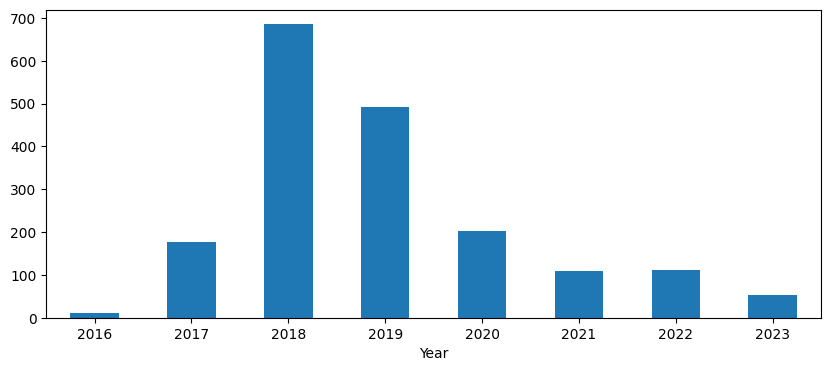

In [81]:
df['Year'].value_counts().sort_index().plot(kind = 'bar', figsize = (10, 4))
plt.xticks(rotation=0)
plt.show()

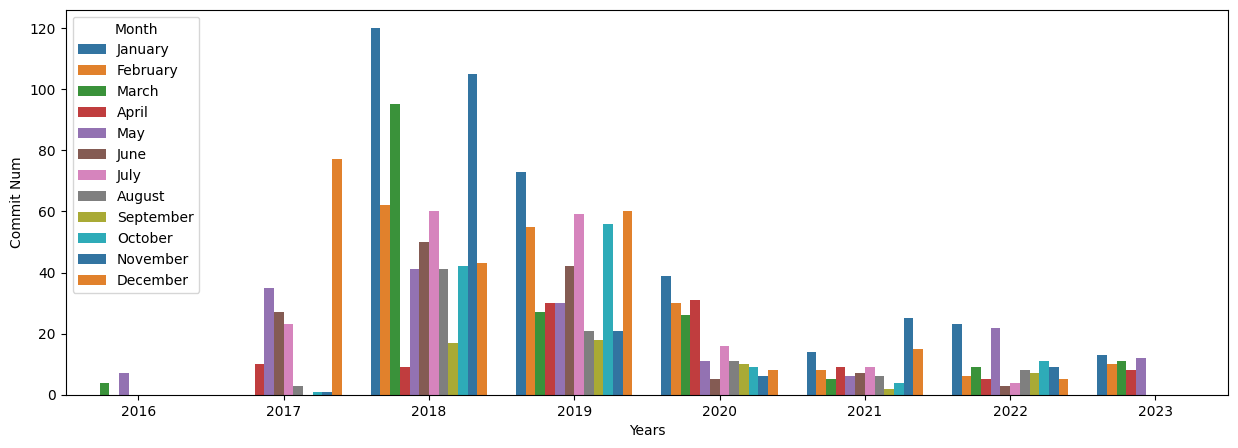

In [84]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df_commits = df.groupby(['Year', 'Month']).size().reset_index(name='Commit Num')
df_commits['Month'] = pd.Categorical(df_commits['Month'], categories=month_order, ordered=True)
df_commits = df_commits.sort_values(['Year', 'Month']).reset_index(drop=True)

fig = plt.figure(figsize = (15, 5))
pic = sns.barplot(data = df_commits, x = 'Year', hue = 'Month', y = 'Commit Num', errorbar = None, hue_order = order, palette = 'tab10')
pic.set(xlabel = 'Years')
plt.legend(title = 'Month', loc = "upper left")

In [44]:
df

,Commit ID,Commit Message,Author Name,Author Email,Created at,Updated at,Files Changed,Branch,Contributor,All Checks Passed,commit_date,Year,Month,commit_date_by_time,File num,commit_date_by_hour,Hour
0,e4fe460e02f9f29ea2553e579e7599a652ca5207,Bump ruff from 0.0.269 to 0.0.270 in /requirem...,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2023-05-29 22:56:26,2023-05-29 22:56:26,['requirements/requirements.txt'],5ddf70615ea35c366199ef6837ea88eba94ba6c8,dependabot[bot],True,2023-05-29 22:56:26,2023,May,22:56:26,2,22,22
1,5ddf70615ea35c366199ef6837ea88eba94ba6c8,Add dark mode feature in documentation (#842),Faizan Alam,51821426+Faizan-Alam-1@users.noreply.github.com,2023-05-28 08:22:35,2023-05-28 08:22:35,"['docs/conf.py', 'docs/doc_requirements.txt']",ca82a4b1dff20dba0c852f4e0ac41501cba6e9ab,Faizan-Alam-1,True,2023-05-28 08:22:35,2023,May,08:22:35,3,8,8
2,ca82a4b1dff20dba0c852f4e0ac41501cba6e9ab,Add copy button in the documentation code snip...,Faizan Alam,51821426+Faizan-Alam-1@users.noreply.github.com,2023-05-27 11:30:02,2023-05-27 11:30:02,"['docs/conf.py', 'docs/doc_requirements.txt']",390c1cdd9fce482f13280724d762c9f9000baaba,Faizan-Alam-1,True,2023-05-27 11:30:02,2023,May,11:30:02,3,11,11
3,390c1cdd9fce482f13280724d762c9f9000baaba,Bump ruff from 0.0.267 to 0.0.269 in /requirem...,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2023-05-23 03:42:52,2023-05-23 03:42:52,['requirements/requirements.txt'],7be69c13cce0f518d3ce5521b4bafcc56bce1445,dependabot[bot],True,2023-05-23 03:42:52,2023,May,03:42:52,2,3,3
4,7be69c13cce0f518d3ce5521b4bafcc56bce1445,Bump pytest-xdist from 3.3.0 to 3.3.1 in /requ...,dependabot[bot],49699333+dependabot[bot]@users.noreply.github.com,2023-05-22 22:23:34,2023-05-22 22:23:34,['requirements/requirements.txt'],874ebff495b088e0aee48ad29e352548dee65e8d,dependabot[bot],True,2023-05-22 22:23:34,2023,May,22:23:34,2,22,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1838,0a6466b919498640cdd35cb44c4ea90972a1f001,Add SteepestDescentMethod sample,AtsushiSakai,asakai.amsl+github@gmail.com,2016-05-02 07:04:07,2016-05-02 07:04:07,['scripts/optimization/SteepestDescentMethod/S...,db832a65c9a52a863f1725d28a592c4e19aa8a44,AtsushiSakai,True,2016-05-02 07:04:07,2016,May,07:04:07,4,7,7
1839,db832a65c9a52a863f1725d28a592c4e19aa8a44,add new sample,AtsushiSakai,asakai.amsl+github@gmail.com,2016-03-27 08:08:00,2016-03-27 08:08:00,['scripts/PathPlanning/RRT/rrt_with_pathsmooth...,786ef04335bfd43cd86b9b6d77e3ba4bf4476094,AtsushiSakai,True,2016-03-27 08:08:00,2016,March,08:08:00,7,8,8
1840,786ef04335bfd43cd86b9b6d77e3ba4bf4476094,Update README,Atsushi Sakai,asakai.amsl+github@gmail.com,2016-03-23 00:27:51,2016-03-23 00:27:51,['README.md'],33cfa18414779b14561acf18959283b18ccb88e7,AtsushiSakai,True,2016-03-23 00:27:51,2016,March,00:27:51,1,0,0
1841,33cfa18414779b14561acf18959283b18ccb88e7,add simple_rrt.py,AtsushiSakai,asakai.amsl+github@gmail.com,2016-03-22 22:55:33,2016-03-22 22:55:33,"['.gitignore', 'scripts/PathPlanning/RRT/simpl...",18195ed7f8b9cf52507fa665be6a6f22b056fe3c,AtsushiSakai,True,2016-03-22 22:55:33,2016,March,22:55:33,4,22,22


In [85]:
df['All Checks Passed'].value_counts()

All Checks Passed
True     1825
False      18
Name: count, dtype: int64

In [91]:
df[df['Contributor'] == 'AtsushiSakai']['Hour'].value_counts()

Hour
12    150
11    144
0     102
23     97
13     80
5      78
6      77
1      71
7      60
4      49
9      45
20     41
18     39
10     39
2      38
17     38
22     31
21     31
19     30
8      25
14     23
3      21
16      9
15      2
Name: count, dtype: int64

In [123]:
df['Words'] = df['Commit Message'].str.strip().str.split(' ')
df_word = df['Words'].explode().value_counts().reset_index()
df_word.columns = ['Word', 'Count']


,Word,Count
0,to,517
1,from,461
2,dependabot[bot],357
3,add,330
4,Update,281
...,...,...
3313,[Commits](https://github.com/pytest-dev/pytest...,1
3314,[Commits](https://github.com/cvxgrp/cvxpy/comp...,1
3315,7.2.1.\r\n-,1
3316,(#497)\n\nBumps,1


In [124]:
df_word['Count'].sum()

15419

In [125]:
df_word

,Word,Count
0,to,517
1,from,461
2,dependabot[bot],357
3,add,330
4,Update,281
...,...,...
3313,[Commits](https://github.com/pytest-dev/pytest...,1
3314,[Commits](https://github.com/cvxgrp/cvxpy/comp...,1
3315,7.2.1.\r\n-,1
3316,(#497)\n\nBumps,1


In [126]:
df_word['Count'].mean()

4.647076552139843